#Introduction to Dataset, DataLoader and Torchvision

In [1]:
#@markdown ---------------
#@markdown ## **⚠️❗ Ejecute esta celda para descargar Shoes dataset❗⚠️**
#@markdown ### Esta celda creará la carpeta ```/content/shoes_data```

!pip install -qq gdown
!gdown -qq "https://drive.google.com/uc?id=1_fIMm5nPp0BLJZKfkJZ_juRmLpRK4iA0" -O /shoes_data.zip
!mkdir /content/shoes_data/
!unzip -qq /shoes_data.zip -d /content/shoes_data
!rm -r /shoes_data.zip
print ("Done!")
#@markdown ---------------

Done!


In [13]:
!ls /content/shoes_data/test/Boot | wc -l
!ls /content/shoes_data/test/Sandal | wc -l
!ls /content/shoes_data/test/Shoe | wc -l

1000
1000
1000


In [12]:
!ls /content/shoes_data/train/Boot | wc -l
!ls /content/shoes_data/train/Sandal | wc -l
!ls /content/shoes_data/train/Shoe | wc -l

4000
4000
4000


In [14]:
import torch
from torch import nn

from torchvision import datasets
from torchvision import transforms as T
from torch.utils.data import DataLoader

from PIL import Image
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [16]:
#---- Importar librerias. Incluya acá todas las librerías que requiera
train_dataset = datasets.ImageFolder(root= '/content/shoes_data/train/' )
test_dataset = datasets.ImageFolder(root= '/content/shoes_data/test/' )

Dataset ImageFolder
    Number of datapoints: 12000
    Root location: /content/shoes_data/train/
(<PIL.Image.Image image mode=RGB size=136x102 at 0x79424BFFAAD0>, 0)


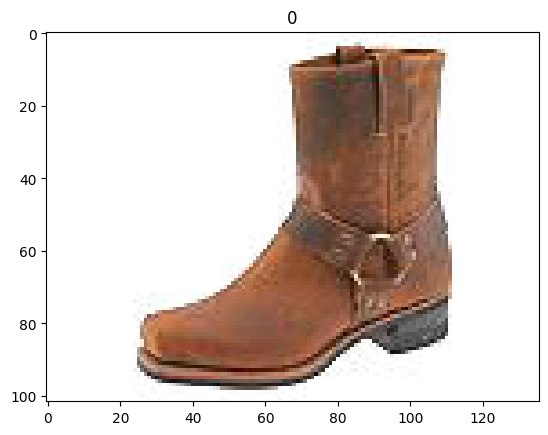

In [23]:
print ( train_dataset )
print ( train_dataset[0] )

plt.imshow( train_dataset[0][0] )
plt.title( train_dataset[0][1] )
plt.show()

In [24]:
def plot_images(imgs, grid_size = (5,5)):
    #
    _, axs = plt.subplots(grid_size[0], grid_size[1], figsize = (grid_size[1]*4, grid_size[0]*4))
    axs = axs.ravel()

    for i, (img, ax) in enumerate(zip(imgs, axs)):
      #if _ : #is tensor?
      #  img = _
      ax.imshow( img, cmap = 'gray' )
      ax.set_axis_off()

    plt.tight_layout()

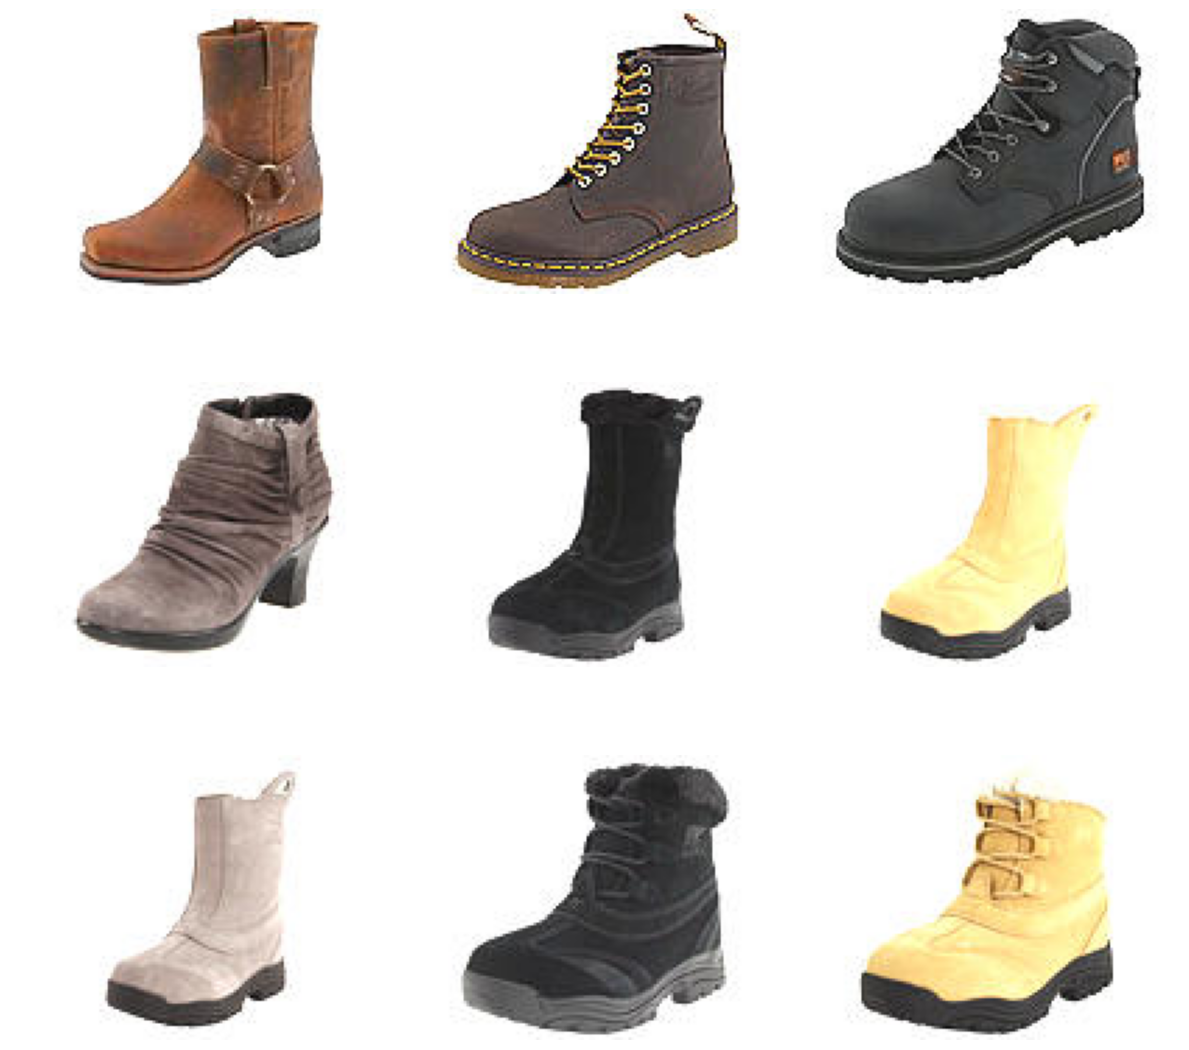

In [25]:
original_imgs = [ train_dataset[i][0]  for i in range(9)]
plot_images (original_imgs, grid_size = (3,3))

In [ ]:
resized_imgs = [ T.Resize(size=size)( _ ) for size in (20,40,60,80)]
plot_images (resized_imgs, grid_size = (2,2))

In [ ]:
padded_imgs = [T.Pad(padding=padding)( _ )  for padding in (3, 10, 30, 50)]
plot_images (padded_imgs, grid_size = (2,2))

In [ ]:
center_crops = [T.CenterCrop(size=size)( _ ) for size in (30, 50, 100, 102)]
plot_images (center_crops, grid_size = (2,2))

In [ ]:
grayscale_imgs = [T.Grayscale()( _ ) for i in range(4)]
plot_images (grayscale_imgs, grid_size = (2,2))

In [ ]:
persp_imgs = [T.RandomPerspective(distortion_scale=0.6, p=1.0)( _ ) for i in range(4)]
plot_images (persp_imgs, grid_size = (2,2))

## Create a dataloader

In [ ]:
image_transforms = T.Compose([T.Resize((64,64), Image.BICUBIC),
                                       T.ToTensor()])

In [ ]:
#---- Importar librerias. Incluya acá todas las librerías que requiera
train_dataset = datasets.ImageFolder(root= _ , transform = _ )
test_dataset = datasets.ImageFolder(root= _ , transform = _ )

train_loader = DataLoader(train_dataset, batch_size= _ , shuffle=True)
test_loader = DataLoader(test_dataset, batch_size= _ )

In [ ]:
trainBatch = next(iter(train_loader))
valBatch = next(iter(test_loader))

In [ ]:
print (trainBatch[0].shape)